In [27]:
# all imports
#from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import cm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.linalg import solve

In [2]:
# create test data
# points P
P = [(1,1), (1,-1), (-1,1), (-1,-1), (0,0), (1,0), (-1,0), (0,1), (0,-1)]
# test z values
f1 = [1.0, -0.5, 1.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0]
f2 = [1.0, -1.0, 0.0, 0.0, 1.0, 0.0, -1.0, -1.0, 1.0]

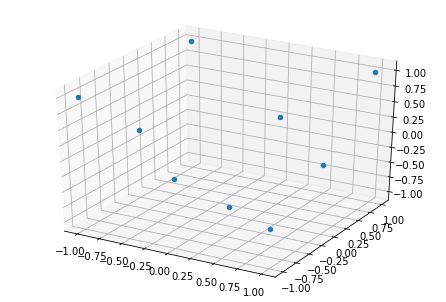

In [3]:
#x = np.array([p[0] for p in P])
#y = np.array([p[1] for p in P])
x, y = zip(*P)
z = f1

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z, depthshade=False)
#plt.savefig('test.pdf')
plt.show()

In [4]:
def B(x,y):
    return np.array([1,x,y,x*x,x*y,y*y])

def BBT(b):
    return b*b[:,None]


In [60]:
# points P
P = [(1,1), (1,-1), (-1,1), (-1,-1), (0,0), (1,0), (-1,0), (0,1), (0,-1)]
# test z values
f1 = [1.0, -0.5, 1.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0]

f = np.zeros(6)
bbt = np.zeros((6,6))

for i in range(len(P)):
    b = B(P[i][0],P[i][1])
    bbt += BBT(b)
    f += b * f1[i]

c = np.linalg.lstsq(bbt,f,rcond=None)[0]


In [61]:
def f(x_,y_): # p is 2D point, returns z value
    b = B(x_,y_)
    return np.dot(b,c)


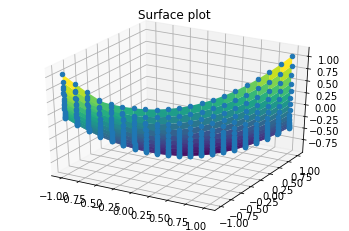

In [62]:
numpoints = 21
#xs = ys = np.linspace(-1, 1, numpoints)
xs = ys = np.outer(np.linspace(-1, 1, numpoints), np.ones(numpoints))


zs = np.zeros((numpoints,numpoints))
for j in range(numpoints):
    for i in range(numpoints):
        zs[i][j] = f(xs[i][0],ys[j][0])


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xs, ys, zs,cmap='viridis', edgecolor='none')
ax.scatter(xs,ys,zs, depthshade=False)
ax.set_title('Surface plot')
plt.show()